<a href="https://colab.research.google.com/github/JaswanthMannem/Gradio/blob/main/4_Image_Generation_With_Stable_Diffusion_in_Gradio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install gradio

In [ ]:
!pip install diffusers

In [3]:
import os
import io
import IPython
from IPython.display import Image, display, HTML
from PIL import Image
import base64

In [4]:
from google.colab import userdata
hf_api_key = userdata.get('HF_API_KEY')

In [5]:
from diffusers import DiffusionPipeline

get_completion = DiffusionPipeline.from_pretrained("stable-diffusion-v1-5/stable-diffusion-v1-5")

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model_index.json:   0%|          | 0.00/541 [00:00<?, ?B/s]

Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

model.safetensors:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

safety_checker/config.json:   0%|          | 0.00/4.72k [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/308 [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/617 [00:00<?, ?B/s]

(…)ature_extractor/preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/743 [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/547 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [6]:
prompt = "a dog in a park"

result = get_completion(prompt).images[0]
result

  0%|          | 0/50 [00:00<?, ?it/s]

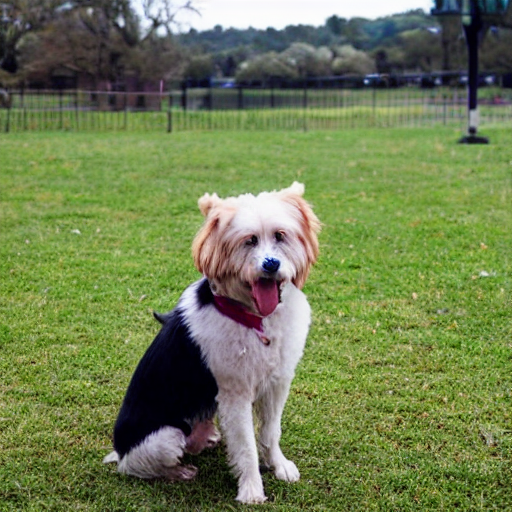

In [9]:
result

In [13]:
import gradio as gr

def base64_to_pil(img_base64):
  base64_decoded = base64.b64decode(img_base64)
  byte_stream = io.BytesIO(base64_decoded)
  pil_image = Image.open(byte_stream)
  return pil_image

def generate(prompt):
  output = get_completion(prompt)
  pil_image = base64_to_pil(output.images[0])
  # pil_image.save('result.png')
  return pil_image

gr.close_all()
demo = gr.Interface(fn=generate,
                    inputs=[gr.Textbox(label="Enter your prompt")],
                    outputs=[gr.Image(label="Results")],
                    title="Image Generation with Stable Diffusion",
                    description="Generate any image with Stable Diffusion",
                    allow_flagging="never",
                    examples=["the spirit of a tamagotchi wandering in the city of Vienna","a mecha robot in a favela"]

)
demo.launch()

Closing server running on port: 7860
Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://2addcbd3dba63858de.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


In [15]:
demo.close()

# Adding Parameters

In [16]:
import gradio as gr

def base64_to_pil(img_base64):
    base64_decoded = base64.b64decode(img_base64)
    byte_stream = io.BytesIO(base64_decoded)
    pil_image = Image.open(byte_stream)
    return pil_image

def generate(prompt, negative_prompt, steps, guidance, width, height):
    params = {
        "negative_prompt": negative_prompt,
        "num_inference_steps": steps,
        "guidance_scale": guidance,
        "width": width,
        "height": height
    }

    output = get_completion(prompt, params)
    pil_image = base64_to_pil(output.images[0])
    return pil_image

In [18]:
gr.close_all()
demo = gr.Interface(fn=generate,
                    inputs=[gr.Textbox(label="Enter your prompt"),
                            gr.Textbox(label="Enter Negative prompt"),
                            gr.Slider(label="Inference Steps",minimum=0,maximum=100,value=25,
                                 info="In how many steps will the denoiser denoise the image?"),
                            gr.Slider(label="Guidance Scale", minimum=1, maximum=20, value=7,
                                 info="Controls how much the text prompt influences the result"),
                            gr.Slider(label="Width", minimum=64, maximum=512, step=64, value=512),
                            gr.Slider(label="Height", minimum=64, maximum=512, step=64, value=512)],
                    outputs=[gr.Image(label="Results")],
                    title="Image Generation with Stable Diffusion",
                    description="Generate any image with Stable Diffusion",
                    allow_flagging="never"

)
demo.launch()

Closing server running on port: 7860
Closing server running on port: 7860
Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://fd0039c994139a9d45.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


In [19]:
demo.close()

Closing server running on port: 7860


# With Gradio Blocks

In [21]:
with gr.Blocks() as demo:
  gr.Markdown("# Image Generation with Stable Diffusion")
  prompt = gr.Textbox(label="Enter your prompt")
  with gr.Row():
    with gr.Column():
      negative_prompt = gr.Textbox(label="Enter Negative prompt")
      steps = gr.Slider(label="Inference Steps", minimum=1, maximum=100, value=25,
                      info="In many steps will the denoiser denoise the image?")
      guidance = gr.Slider(label="Guidance Scale", minimum=1, maximum=20, value=7,
                info="Controls how much the text prompt influences the result")
      width = gr.Slider(label="Width", minimum=64, maximum=512, step=64, value=512)
      height = gr.Slider(label="Height", minimum=64, maximum=512, step=64, value=512)
      btn = gr.Button("Generate")
    with gr.Column():
      output = gr.Image(label="Results")
  btn.click(fn=generate, inputs=[negative_prompt,steps,guidance,width,height], outputs=[output])
gr.close_all()
demo.launch()

/usr/local/lib/python3.10/dist-packages/gradio/utils.py:1002: UserWarning: Expected 6 arguments for function <function generate at 0x7dd88cd1f250>, received 5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/gradio/utils.py:1006: UserWarning: Expected at least 6 arguments for function <function generate at 0x7dd88cd1f250>, received 5.
  warnings.warn(


Closing server running on port: 7860
Closing server running on port: 7860
Closing server running on port: 7860
Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://a0cd4e7721416eaa9b.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


In [23]:
demo.close()

Closing server running on port: 7860


# With Gradio Accordian and scale

In [25]:
with gr.Blocks() as demo:
  gr.Markdown("# Image Generation with stable Diffusion")
  with gr.Row():
    with gr.Column(scale=4):
      prompt = gr.Textbox(label="Enter your prompt")
    with gr.Column(scale=1,min_width=50):
      btn = gr.Button("Generate")
  with gr.Accordion("Advanced options", open=False): #Let's hide the advanced options!
    negative_prompt = gr.Textbox(label="Enter Negative prompt")
    with gr.Row():
      with gr.Column():
        steps = gr.Slider(label="Inference Steps", minimum=1, maximum=100, value=25,
                        info="In many steps will the denoiser denoise the image?")
        guidance = gr.Slider(label="Guidance Scale", minimum=1, maximum=20, value=7,
                  info="Controls how much the text prompt influences the result")
      with gr.Column():
        width = gr.Slider(label="Width", minimum=64, maximum=512, step=64, value=512)
        height = gr.Slider(label="Height", minimum=64, maximum=512, step=64, value=512)
  output = gr.Image(label="Results")
  btn.click(fn=generate, inputs=[negative_prompt,steps,guidance,width,height], outputs=[output])
gr.close_all()
demo.launch()

/usr/local/lib/python3.10/dist-packages/gradio/utils.py:1002: UserWarning: Expected 6 arguments for function <function generate at 0x7dd88cd1f250>, received 5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/gradio/utils.py:1006: UserWarning: Expected at least 6 arguments for function <function generate at 0x7dd88cd1f250>, received 5.
  warnings.warn(


Closing server running on port: 7860
Closing server running on port: 7860
Closing server running on port: 7860
Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://e11365bf9befdb63b4.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


In [34]:
demo.close()

Closing server running on port: 7860
